In [12]:
from apportionment import Apportionment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

testy:

3 - standard 100K/100/1000

6 - 100K/100/5000

7 - 500K/100/1000

8 - 500K/100/5000

9 - 1M/10/10000

10 - 4388872/10/43888

11 - 1M/100/10000

12 - 100K/100/5000

In [23]:
# Simulation parameters
voters = 100000
num_seats = 150
nit = 1000
group_size = 5000
link='NRSR2023_clean.csv'
file='test2811_12.csv'

ap = Apportionment(num_seats, voters, link=link) 
# -> TODO higher tresholds for coalitions
print("No of votes from source:", sum(ap.subject_votes.values()))
print("Considered votes:", ap.voters)
print("No. of seats:", num_seats)
weights = ap.subject_votes
# print(weights)

#apportionment test
result = ap.divide_seats("slovak")
if not (sum(result.values()) == 150): print(result.values()) 
else: print("seats ok")
if not (list(result.values()) == [32, 16, 11, 10, 42, 27, 12]): print(result.values()) 
else: print("apport ok")
print("Apportionment should work correctly.")

print("sum of probs:", sum(ap.probabilities.values()))
if not os.path.exists(file):
    ap.iterated_simulate('boxes', file, nit=nit, group_size=group_size)
else:
    print("Simulation did not happen, file already exists!")

link NRSR2023_clean.csv
No of votes from source: 4388872
Considered votes: 100000
No. of seats: 150
seats ok
apport ok
Apportionment should work correctly.
sum of probs: 0.9999999999999998
Initializing simulation...
1 / 1000
2 / 1000
3 / 1000
4 / 1000
5 / 1000
6 / 1000
7 / 1000
8 / 1000
9 / 1000
10 / 1000
11 / 1000
12 / 1000
13 / 1000
14 / 1000
15 / 1000
16 / 1000
17 / 1000
18 / 1000
19 / 1000
20 / 1000
21 / 1000
22 / 1000
23 / 1000
24 / 1000
25 / 1000
26 / 1000
27 / 1000
28 / 1000
29 / 1000
30 / 1000
31 / 1000
32 / 1000
33 / 1000
34 / 1000
35 / 1000
36 / 1000
37 / 1000
38 / 1000
39 / 1000
40 / 1000
41 / 1000
42 / 1000
43 / 1000
44 / 1000
45 / 1000
46 / 1000
47 / 1000
48 / 1000
49 / 1000
50 / 1000
51 / 1000
52 / 1000
53 / 1000
54 / 1000
55 / 1000
56 / 1000
57 / 1000
58 / 1000
59 / 1000
60 / 1000
61 / 1000
62 / 1000
63 / 1000
64 / 1000
65 / 1000
66 / 1000
67 / 1000
68 / 1000
69 / 1000
70 / 1000
71 / 1000
72 / 1000
73 / 1000
74 / 1000
75 / 1000
76 / 1000
77 / 1000
78 / 1000
79 / 1000
80 

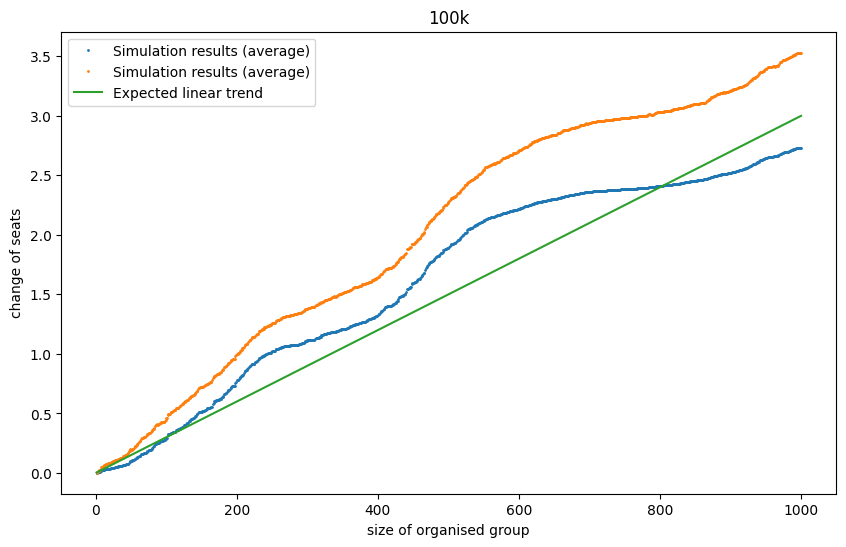

In [14]:
df = pd.read_csv('test2811_3.csv')
df['weight'] = df['party_number'].map(weights)

grouped_df = df.groupby('samples').mean().reset_index()
weighted_df = df.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')

plt.figure(figsize=(10, 6))

x_values = grouped_df['samples']
y_values = grouped_df['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average)')

x_values = weighted_df['samples']
y_values = weighted_df['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average)')

x = np.arange(1, 1001)
y = (3/1000) * x

plt.plot(x, y, label='Expected linear trend')
plt.xlabel('size of organised group')
plt.ylabel('change of seats')
plt.title('100k')

plt.legend()
plt.show()

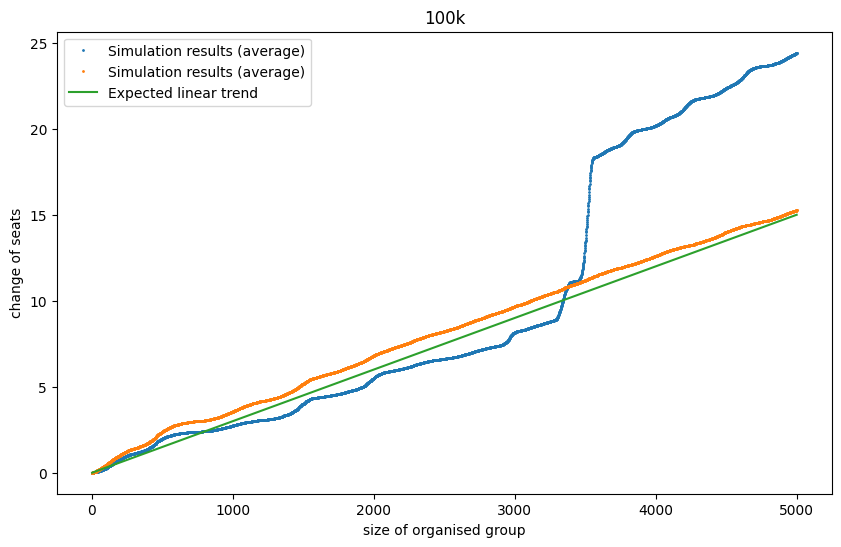

In [15]:
df = pd.read_csv('test2811_6.csv')
df['weight'] = df['party_number'].map(weights)

grouped_df = df.groupby('samples').mean().reset_index()
weighted_df = df.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')

plt.figure(figsize=(10, 6))

x_values = grouped_df['samples']
y_values = grouped_df['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average)')

x_values = weighted_df['samples']
y_values = weighted_df['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average)')

x = np.arange(1, 5001)
y = (3/1000) * x

plt.plot(x, y, label='Expected linear trend')
plt.xlabel('size of organised group')
plt.ylabel('change of seats')
plt.title('100k')

plt.legend()
plt.show()

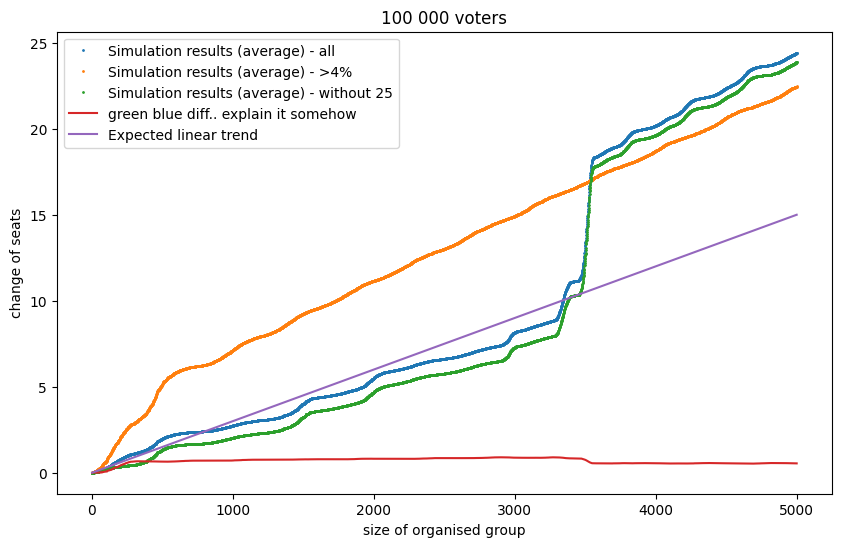

In [16]:
#POZN graf c 3
df = pd.read_csv('test2811_6.csv')

# display(df)
df4 = df.loc[(df['party_number'] == 0) | (df['party_number'] == 3) | (df['party_number'] == 5) | (df['party_number'] == 12) | (df['party_number'] == 15) | (df['party_number'] == 16) | (df['party_number'] == 17) | (df['party_number'] == 18) | (df['party_number'] == 23) | (df['party_number'] == 25)]
df0 = df.loc[df['party_number'] != 25] # 25 is edge case, almost got into parliament
df25 = df.loc[df['party_number'] == 25] 

weighted_df = df.groupby('samples').mean().reset_index()
weighted_df4 = df4.groupby('samples').mean().reset_index()
weighted_df0 = df0.groupby('samples').mean().reset_index()
weighted_df25 = df25.groupby('samples').mean().reset_index()


plt.figure(figsize=(10, 6))

x_values1 = weighted_df['samples']
y_values1 = weighted_df['diff']

plt.plot(x_values1, y_values1, 'o', markersize=1, label='Simulation results (average) - all')

x_values = weighted_df4['samples']
y_values = weighted_df4['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average) - >4%')

x_values2 = weighted_df0['samples']
y_values2 = weighted_df0['diff']

plt.plot(x_values2, y_values2, 'o', markersize=1, label='Simulation results (average) - without 25')

# only 25, makes it very difficult to read other curves
# x_values = grouped_df25['samples']
# y_values = grouped_df25['diff']

# plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average) - only 25')


plt.plot(x_values1, y_values1 - y_values2, label='green blue diff.. explain it somehow')


x = np.arange(1, 5001)
y = (3/1000) * x

plt.plot(x, y, label='Expected linear trend')
plt.xlabel('size of organised group')
plt.ylabel('change of seats')
plt.title('100 000 voters')

plt.legend()
plt.show()

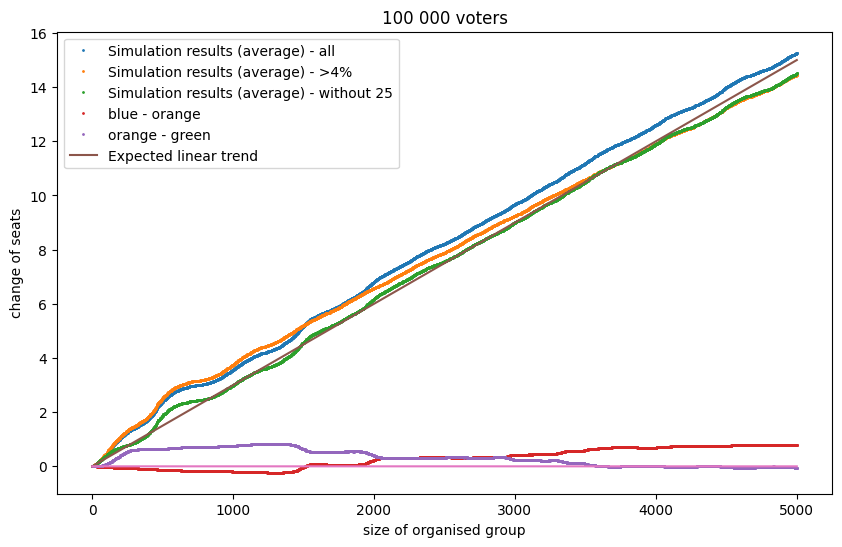

In [24]:
df = pd.read_csv('test2811_6.csv')
df['weight'] = df['party_number'].map(weights)

# display(df)
df4 = df.loc[(df['party_number'] == 0) | (df['party_number'] == 3) | (df['party_number'] == 5) | (df['party_number'] == 12) | (df['party_number'] == 15) | (df['party_number'] == 16) | (df['party_number'] == 17) | (df['party_number'] == 18) | (df['party_number'] == 23) | (df['party_number'] == 25)]
df0 = df.loc[df['party_number'] != 25] # 25 is edge case, almost got into parliament
df25 = df.loc[df['party_number'] == 25] 

weighted_df = df.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')
weighted_df4 = df4.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')
weighted_df0 = df0.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')
weighted_df25 = df25.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')


plt.figure(figsize=(10, 6))

x_values = weighted_df['samples']
y_values = weighted_df['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average) - all')

x_values4 = weighted_df4['samples']
y_values4 = weighted_df4['diff']

plt.plot(x_values4, y_values4, 'o', markersize=1, label='Simulation results (average) - >4%')

x_values0 = weighted_df0['samples']
y_values0 = weighted_df0['diff']

plt.plot(x_values0, y_values0, 'o', markersize=1, label='Simulation results (average) - without 25')

# only 25, makes it very difficult to read other curves
# x_values25 = grouped_df25['samples']
# y_values25 = grouped_df25['diff']

# plt.plot(x_values25, y_values25, 'o', markersize=1, label='Simulation results (average) - only 25')

plt.plot(x_values, y_values - y_values4, 'o', markersize=1, label='blue - orange')
plt.plot(x_values, y_values4 - y_values0, 'o', markersize=1, label='orange - green')

x = np.arange(1, 5001)
y = (3/1000) * x

plt.plot(x, y, label='Expected linear trend')
plt.plot(x, y * 0)

plt.xlabel('size of organised group')
plt.ylabel('change of seats')
plt.title('100 000 voters')

plt.legend()
plt.show()

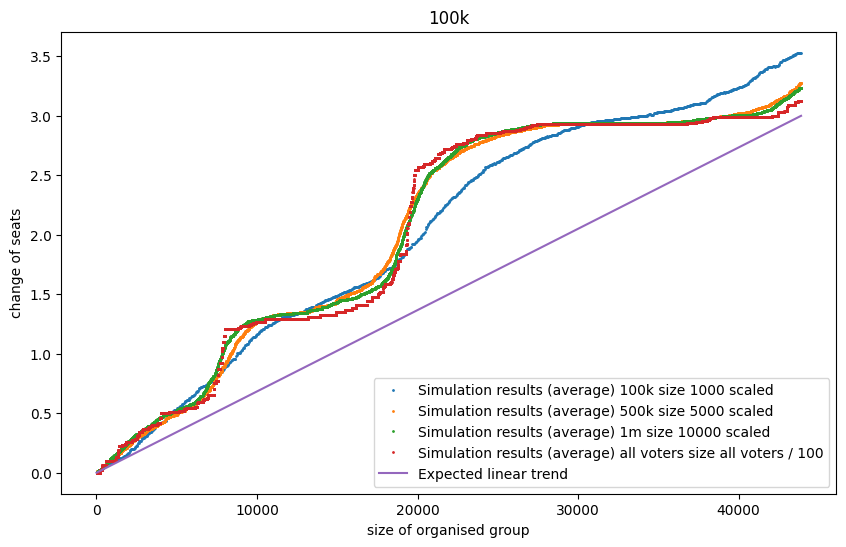

In [18]:
df1 = pd.read_csv('test2811_3.csv')
df2 = pd.read_csv('test2811_8.csv')
df3 = pd.read_csv('test2811_11.csv')
df4 = pd.read_csv('test2811_10.csv')

df1['weight'] = df1['party_number'].map(weights)
df2['weight'] = df2['party_number'].map(weights)
df3['weight'] = df3['party_number'].map(weights)
df4['weight'] = df4['party_number'].map(weights)

weighted_df1 = df1.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')
weighted_df2 = df2.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')
weighted_df3 = df3.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')
weighted_df4 = df4.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')

plt.figure(figsize=(10, 6))

x_values = weighted_df1['samples'] * 43.888
y_values = weighted_df1['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average) 100k size 1000 scaled')

x_values = weighted_df2['samples'] * 8.7776
y_values = weighted_df2['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average) 500k size 5000 scaled')

x_values = weighted_df3['samples'] * 4.3888
y_values = weighted_df3['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average) 1m size 10000 scaled')

x_values = weighted_df4['samples']
y_values = weighted_df4['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average) all voters size all voters / 100')

x = np.arange(1, 43889)
y = (3/43888) * x

plt.plot(x, y, label='Expected linear trend')
plt.xlabel('size of organised group')
plt.ylabel('change of seats')
plt.title('100k')

plt.legend()
plt.show()

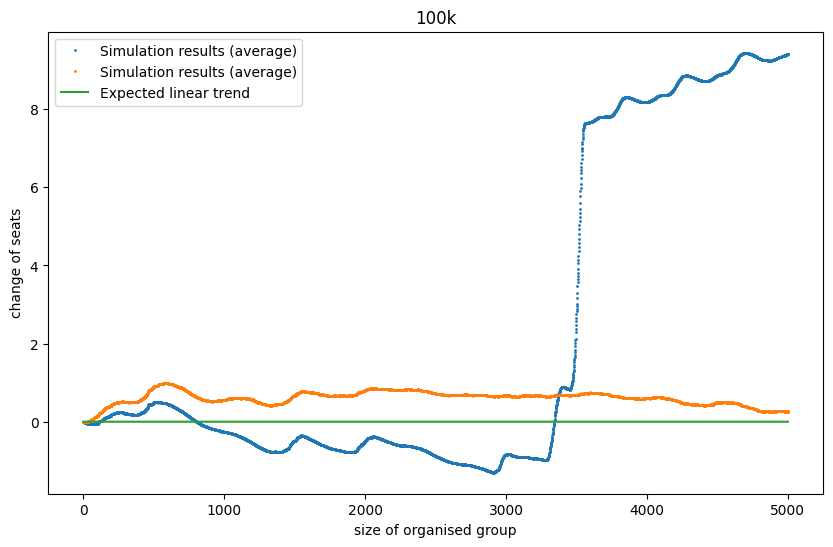

In [19]:
df = pd.read_csv('test2811_6.csv')
df['weight'] = df['party_number'].map(weights)

gropued_df = df.groupby('samples').mean().reset_index()
weighted_df = df.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')

plt.figure(figsize=(10, 6))

x = np.arange(1, 5001)
y = (3/1000) * x


x_values = gropued_df['samples']
y_values = gropued_df['diff']

plt.plot(x_values, y_values - y, 'o', markersize=1, label='Simulation results (average)')

x_values = weighted_df['samples']
y_values = weighted_df['diff']

plt.plot(x_values, y_values - y, 'o', markersize=1, label='Simulation results (average)')



plt.plot(x, y * 0, label='Expected linear trend')
plt.xlabel('size of organised group')
plt.ylabel('change of seats')
plt.title('100k')

plt.legend()
plt.show()

In [20]:
def rolling_jump(y, eps, window):
    y_mod = y.rolling(window=window, center=True, min_periods=1).mean()
    res = []
    for i in range(len(y_mod)-1):
        if abs(y_mod[i] - y_mod[i+1]) > eps:
            res.append(i)
    return res

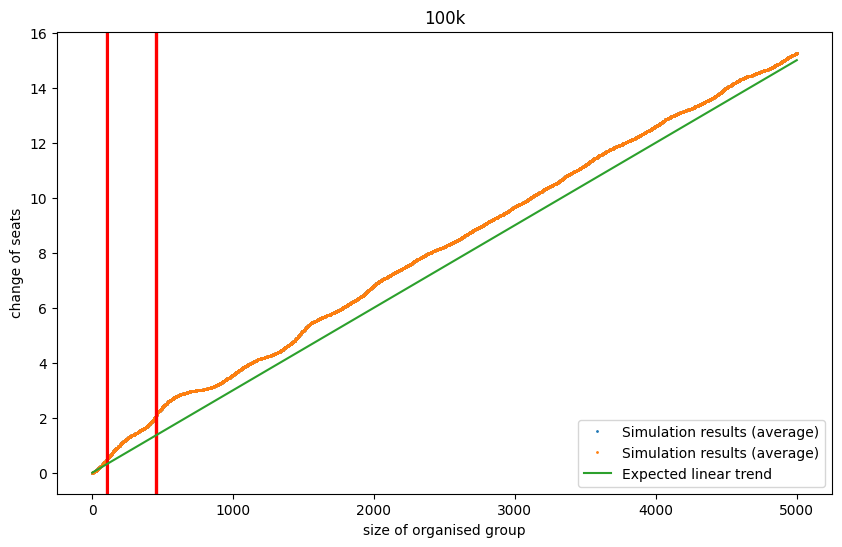

In [21]:
df = pd.read_csv('test2811_6.csv')
df['weight'] = df['party_number'].map(weights)

weighted_df = df.groupby('samples').mean().reset_index()
weighted_df = df.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')

plt.figure(figsize=(10, 6))

x_values = weighted_df['samples']
y_values = weighted_df['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average)')

x_values = weighted_df['samples']
y_values = weighted_df['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average)')

x = np.arange(1, 5001)
y = (3/1000) * x

for xi in rolling_jump(y_values, 0.01, 7):
    plt.axvline(x=x[xi], color = 'red')


plt.plot(x, y, label='Expected linear trend')
plt.xlabel('size of organised group')
plt.ylabel('change of seats')
plt.title('100k')

plt.legend()
plt.show()

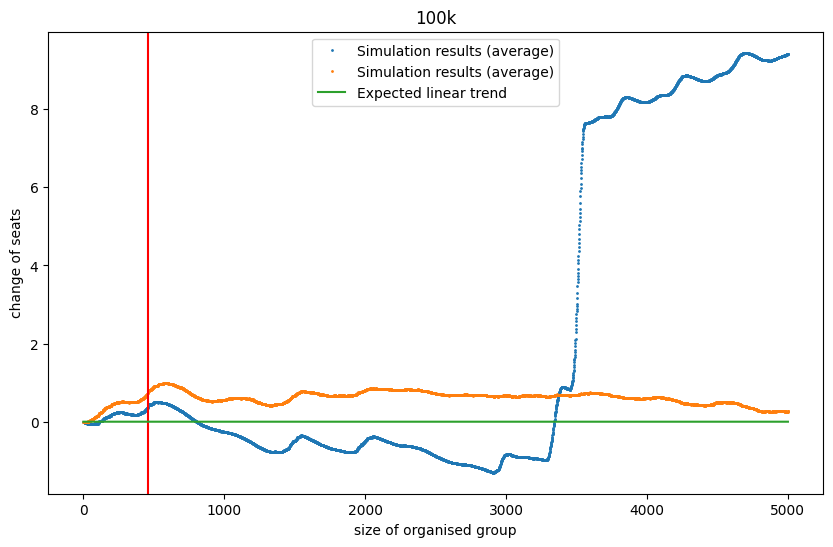

In [22]:
df = pd.read_csv('test2811_6.csv')
df['weight'] = df['party_number'].map(weights)

gropued_df = df.groupby('samples').mean().reset_index()
weighted_df = df.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')

plt.figure(figsize=(10, 6))

x = np.arange(1, 5001)
y = (3/1000) * x


x_values = gropued_df['samples']
y_values = gropued_df['diff']

plt.plot(x_values, y_values - y, 'o', markersize=1, label='Simulation results (average)')

x_values = weighted_df['samples']
y_values = weighted_df['diff']

plt.plot(x_values, y_values - y, 'o', markersize=1, label='Simulation results (average)')

for xi in rolling_jump(y_values - y, 0.01, 7):
    plt.axvline(x=x[xi], color = 'red')


plt.plot(x, y * 0, label='Expected linear trend')
plt.xlabel('size of organised group')
plt.ylabel('change of seats')
plt.title('100k')

plt.legend()
plt.show()